# Notebook - Gridworld - ValueIteration - withFunctions

In this notebook we want to [???DA FARE]

What we call a "gridworld" is, essentially, a grid of `Lx` columns and `Ly` rows. At each iteration the agent will be in a cell of this grid; the actions that it is allowed to do are:
- move to the right cell
- move to the left cell
- move to the cell above
- move to the cell below

An amount of cells equal to `Nblocks` is seen as walls (meaning that the agent cannot stay in those cells, nor can jump over them). A list of `goals` contains the coordinates of the cells that the agent aims to reach. Each goal-cell is associated with a reward, a value stored in the list `rewards_list`: when the agent succeeds in occupying a goal-cell it will get the associated reward.

Reached one of the goal-cell, the episode is over ("the game is over", but in a nice way because the agent won): the agent will not continue to play, so it will not aim to another goal-cell.

## Libraries

First of all we need to import the libraries and the files that we will need to execute the code. `PY_GW_VI_plot` is the file containing the functions useful to visually plot some information regarding the specific gridworld. `PY_GW_VI_tools` contains the functions that will be used to get information, manipulate and act on the gridworld.

In [93]:
import numpy as np
import PY_GW_VI_plot
import PY_GW_VI_tools
import time
import numpy

## Example 1: Solving a standard gridworld problem

In this first example the grid contains just one goal-cell: the aim of the agent is to reach that cell, obtaining the reward that it carries. Let's define the parameters that describe the environment of the grid:

In [94]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached
goal = [(9,9)]
rewards_list = [1]

# possible actions that the agent can do (i.e., how it moves in the grid).
# Observe that the way they are defined will make easy the computation the new state
Actions = np.array([[1,0],[-1,0],[0,1],[0,-1]]) # respectively: right, left, up, down 

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it hadn't reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

Remark that we just set the amount `Nblocks` of the wall-cells, not their position in the grid.

Now that we have defined the parameters we can initialise the specific play ground that we call `World`, that is a concrete instance of a gridworld. The code will plot some visual images of the gridworld. A set of three images will display the gridworld:
- as it is
- with each cell containing its associated value of [???COSA, ESATTAMENTE?]
- with each cell containing the indication of the best action to choose at the following iteration

Our code will also print some information:
- whether we succeeded in having a value lower than `tolerance`
- at which iteration we got a value lower than `tolerance`

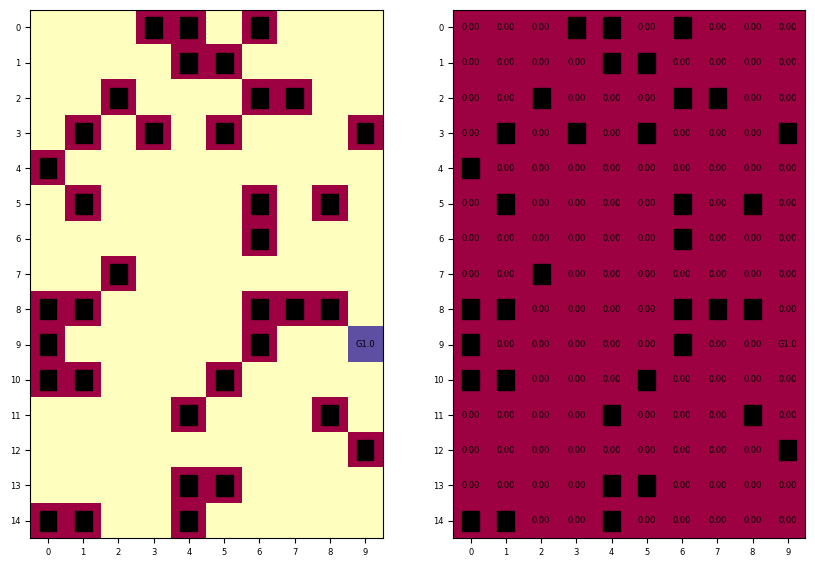

KeyboardInterrupt: 

In [99]:
# GRIDWORLD 1

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

Due to how the functions are build, observe that the same code may give a different instance (the position of the `Nblocks` wall-cells may vary) is different:

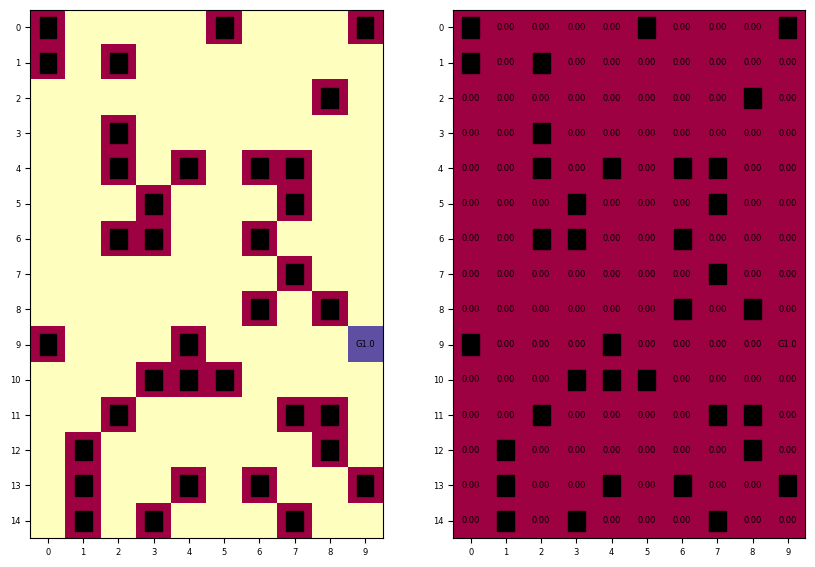

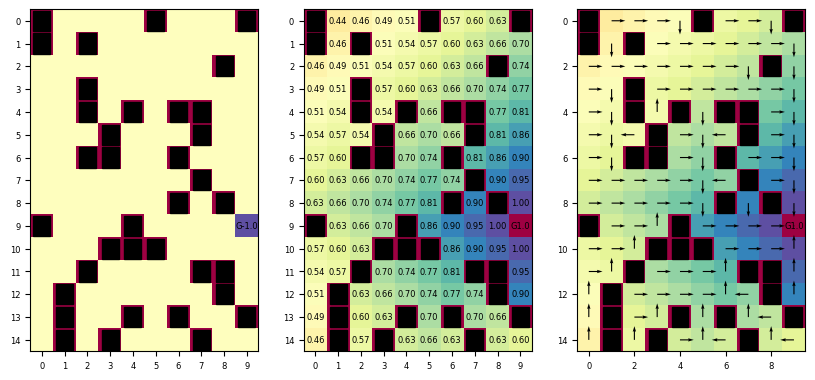

Yes, we converge w.r.t. our tolerance
Distance between V_17(S) and V_18(S) is: 0.0


In [81]:
# GRIDWORLD 2

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

### Tests

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

#### Changing max_n_of_iterations

max_n_of_iterations =  2


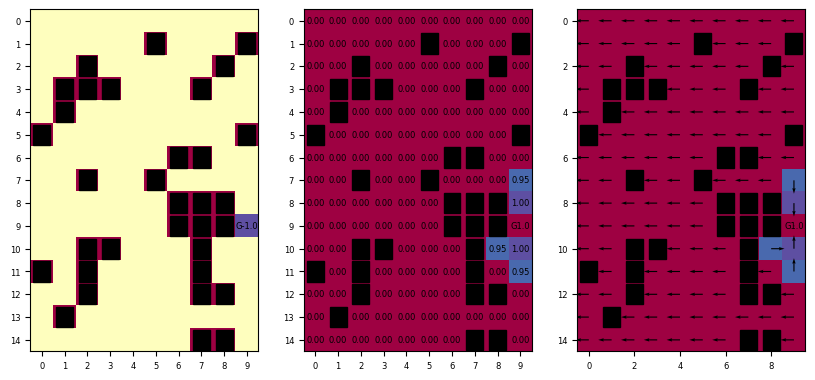

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 0.13435028842544403



max_n_of_iterations =  4


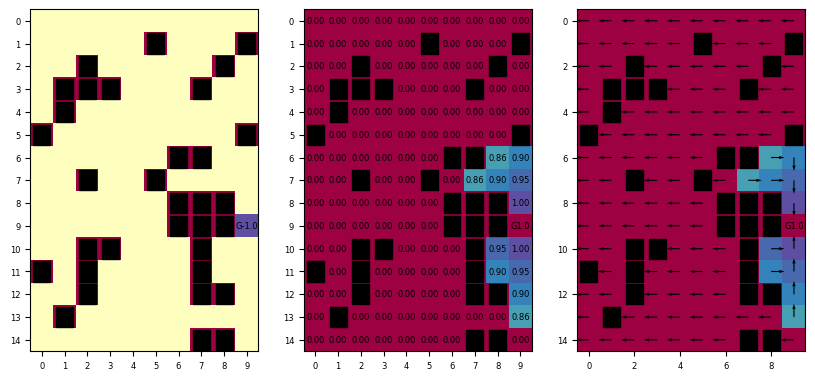

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 0.12125113530396323



max_n_of_iterations =  6


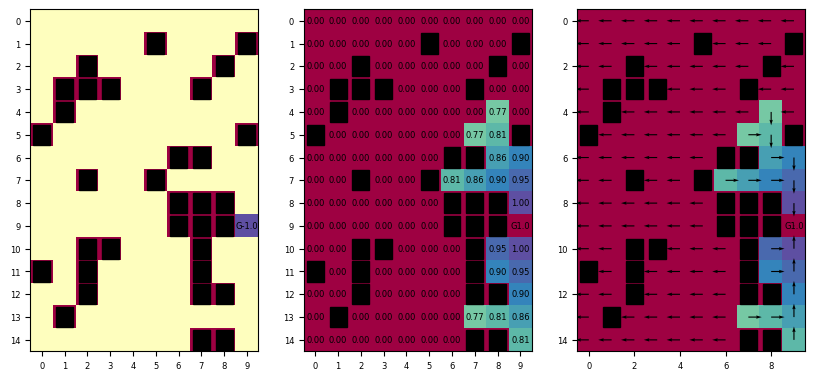

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 0.1094291496118268



max_n_of_iterations =  8


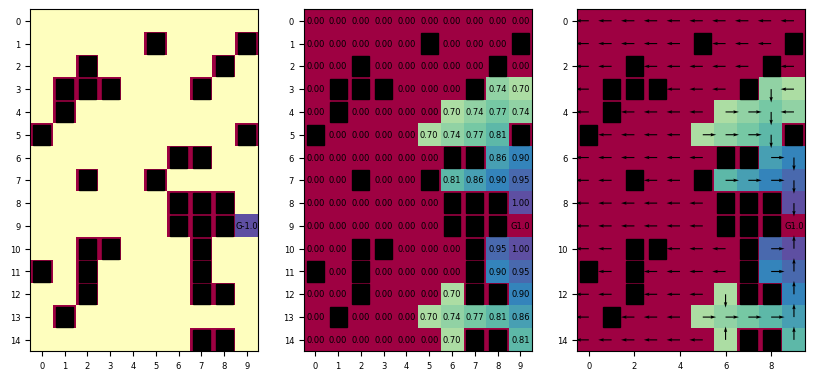

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 0.13966745921874996



max_n_of_iterations =  10


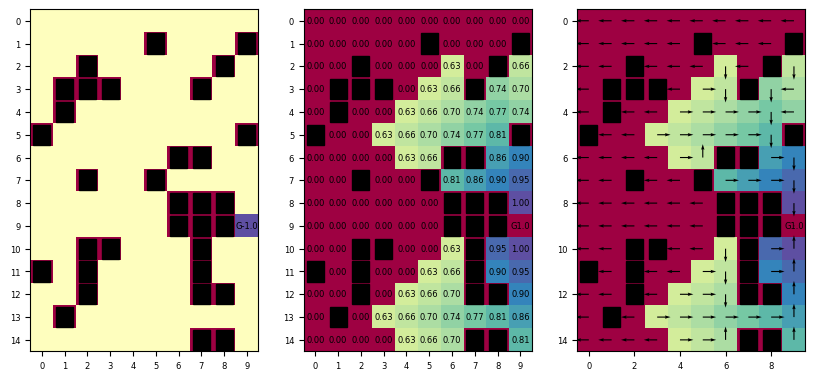

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 0.1627296978546977



max_n_of_iterations =  12


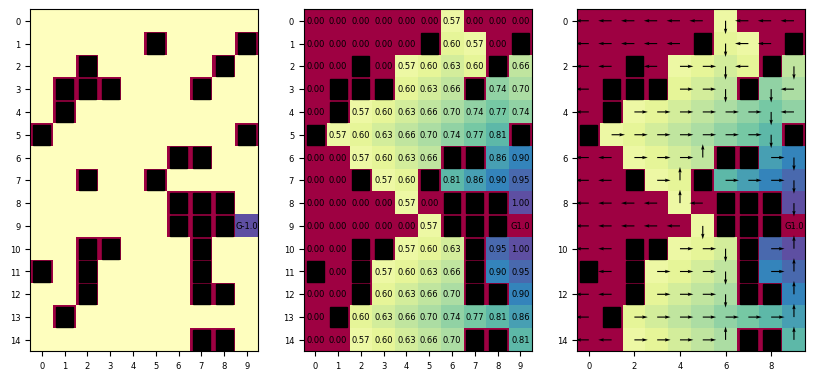

No, we stop before reaching the tolerance threshold
Distance between V_12(S) and V_13(S) is: 0.1608809609552874



max_n_of_iterations =  14


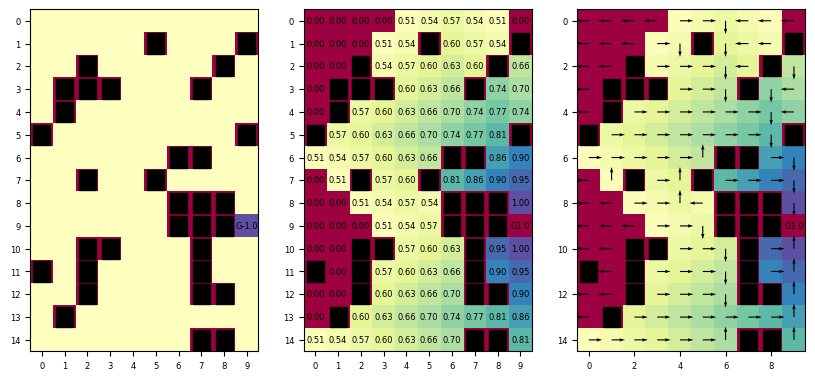

No, we stop before reaching the tolerance threshold
Distance between V_14(S) and V_15(S) is: 0.11855127598711412



max_n_of_iterations =  16


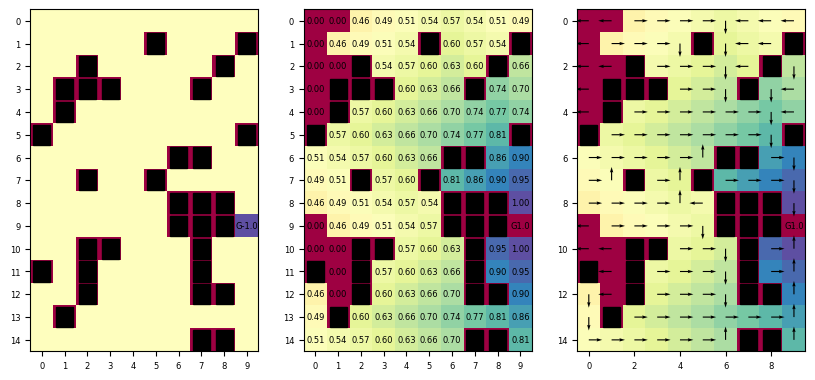

No, we stop before reaching the tolerance threshold
Distance between V_16(S) and V_17(S) is: 0.08458501915093813



max_n_of_iterations =  18


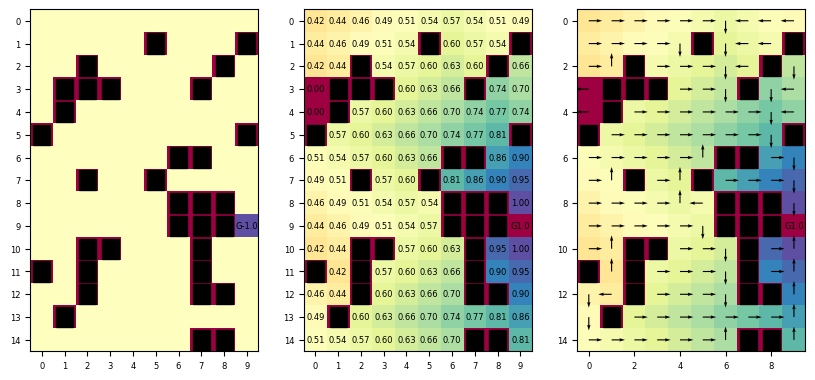

No, we stop before reaching the tolerance threshold
Distance between V_18(S) and V_19(S) is: 0.06827876482456254



max_n_of_iterations =  20


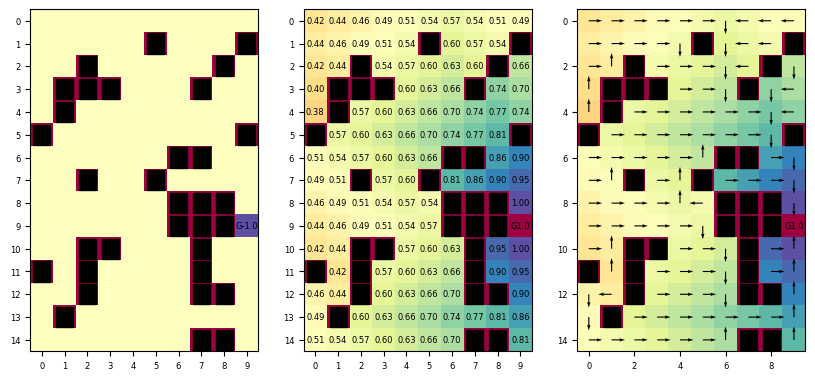

No, we stop before reaching the tolerance threshold
Distance between V_20(S) and V_21(S) is: 0.030810792627083836





In [82]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

Observe that the more high the number of iteration, the more far from the goal-cell we have the optimal indications to reach the aim. Somehow, the indications propagates from the goal-cell to the rest of the grid.

#### Changing gamma

gamma =  0.1


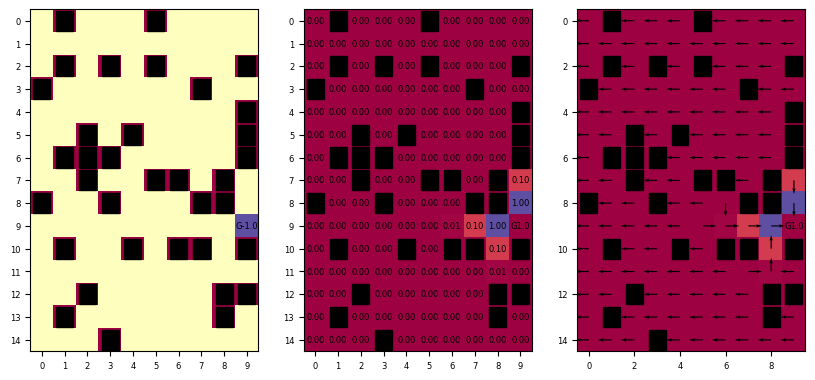

Yes, we converge w.r.t. our tolerance
Distance between V_3(S) and V_4(S) is: 0.00016329931618554524



gamma =  0.2


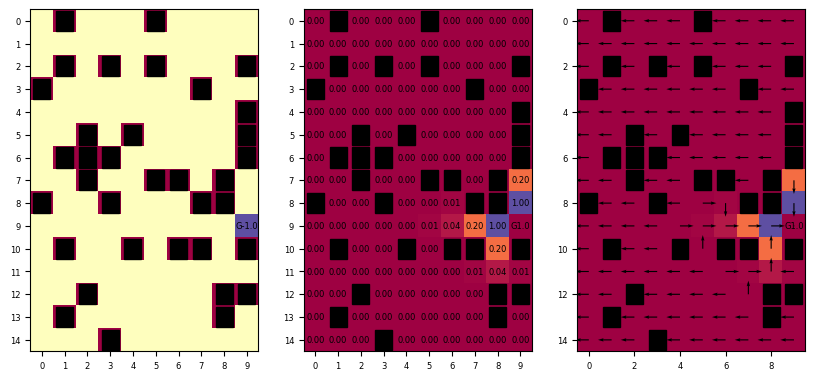

Yes, we converge w.r.t. our tolerance
Distance between V_4(S) and V_5(S) is: 0.0002921186973360887



gamma =  0.30000000000000004


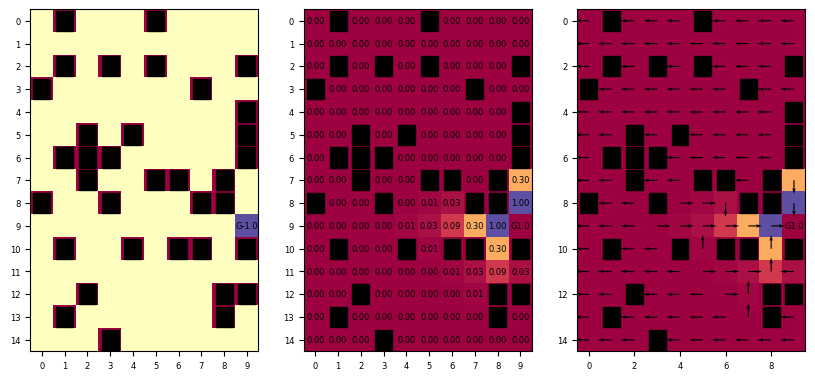

Yes, we converge w.r.t. our tolerance
Distance between V_5(S) and V_6(S) is: 0.00044365527157918486



gamma =  0.4


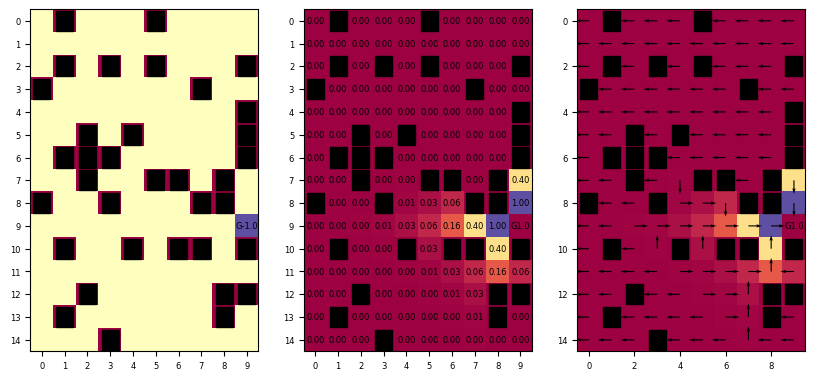

Yes, we converge w.r.t. our tolerance
Distance between V_6(S) and V_7(S) is: 0.0008848371300226202



gamma =  0.5


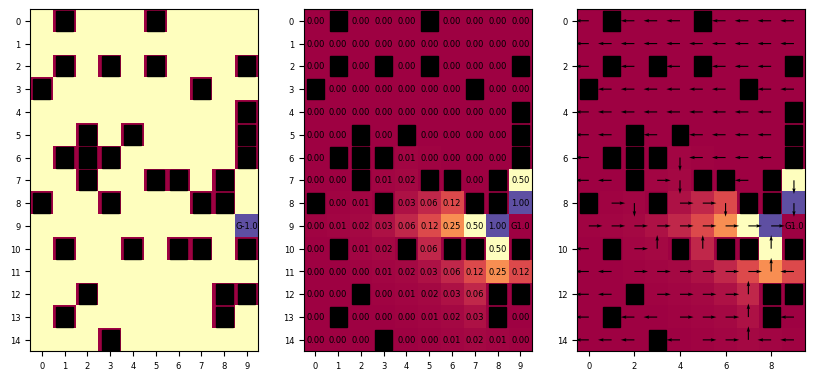

Yes, we converge w.r.t. our tolerance
Distance between V_8(S) and V_9(S) is: 0.0009021097956087903



gamma =  0.6000000000000001


KeyboardInterrupt: 

In [83]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

Here we observe that the less the value of gamma, the less the amount of iterations needed for convergence. [???AGGIUNGERE]

#### An average time to fall below the tolerance

The generation of the gridworld is partially random since the amount `Nblock` is fixed but the positions of the walls is not. Here we will investigate an average of the time to reach the convergence if `Lx` and `Ly` change (the time required to do the plots will not be considered). Remark that the value of `max_n_of_iterations` is just important to set a stop condition to the algorithm and a high value of `num_tests` helps to obtain a better estimation:

In [ ]:
# (3) An average time to fall below the tolerance

def function_time(max_n_of_iterations, num_tests, Lx, Ly):

    times = []

    for i in range(1, num_tests + 1):

        start_time = time.time()

        # Build the world (and initial values)
        World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
        Values = np.zeros((Ly,Lx))

        # Solve and plot
        World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(
            World = World,
            initial_values = Values,
            max_n_of_iterations = max_n_of_iterations,
            gamma = gamma,
            tolerance = tolerance,
            possible_actions = Actions,
            p = p,
            random_flag=random_flag)
    
        end_time = time.time()
        times.append(end_time - start_time)

    average_time = sum(times) / num_tests
    std_deviation = numpy.std(times)
    print(f"Lx = {Lx}; Ly = {Ly}")
    print(f"max_n_of_iterations = {max_n_of_iterations}; {num_tests} tests")
    print(f"Average time: {average_time} seconds")
    print(f"Standard deviation: {std_deviation} seconds")

function_time(1000, 50, 10, 15)
print("\n")
function_time(1000, 50, 15, 15)
print("\n")
function_time(1000, 50, 20, 20)
print("\n")
function_time(1000, 50, 25, 25)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.06419219970703124 seconds
Standard deviation: 0.01357764676688337 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.1016144323348999 seconds
Standard deviation: 0.009839149105283485 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.21523242473602294 seconds
Standard deviation: 0.014636825038504895 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.5432048749923706 seconds
Standard deviation: 0.029847089773373085 seconds




#### Number of iterations to converge

Let's study the average amount of iteration needed to get the convergence (so to fall below the requested tolerance):

In [ ]:
# (3) An average time to fall below the tolerance

def function_convergence(max_n_of_iterations, num_tests, Lx, Ly):

    iterations_convergence = []

    for i in range(1, num_tests + 1):

        # Build the world (and initial values)
        World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
        Values = np.zeros((Ly,Lx))

        # Solve
        World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(
            World = World,
            initial_values = Values,
            max_n_of_iterations = max_n_of_iterations,
            gamma = gamma,
            tolerance = tolerance,
            possible_actions = Actions,
            p = p,
            random_flag=random_flag)
        

    average_time = sum(times) / num_tests
    std_deviation = numpy.std(times)
    print(f"Lx = {Lx}; Ly = {Ly}")
    print(f"max_n_of_iterations = {max_n_of_iterations}; {num_tests} tests")
    print(f"Average time: {average_time} seconds")
    print(f"Standard deviation: {std_deviation} seconds")

function_convergence(1000, 50, 10, 15)
print("\n")
function_convergence(1000, 50, 15, 15)
print("\n")
function_convergence(1000, 50, 20, 20)
print("\n")
function_convergence(1000, 50, 25, 25)
print("\n")

## Example 2: Solving a gridworld problem with multi goals

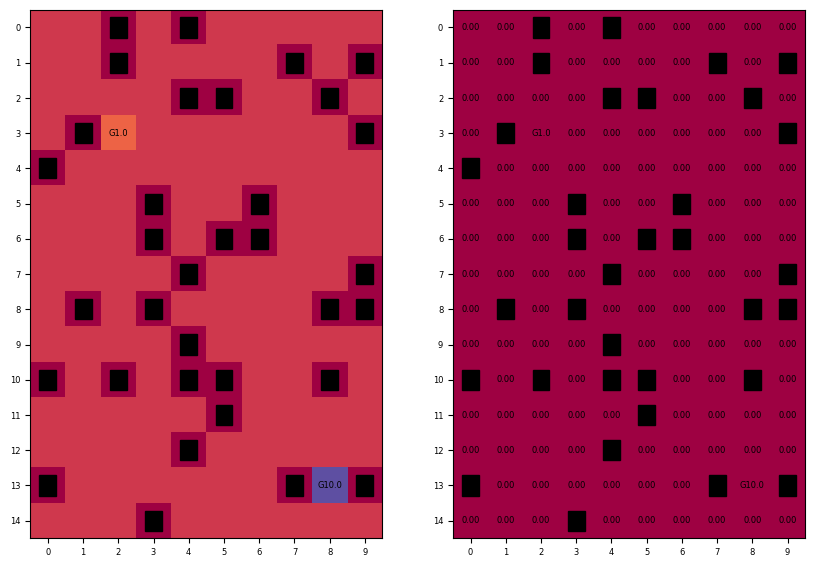

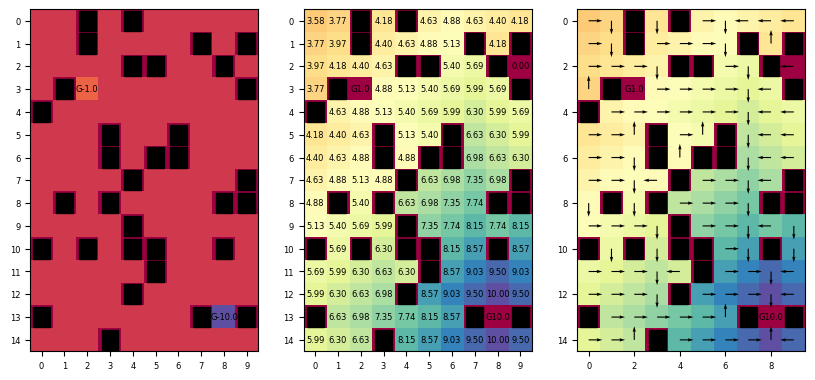

Yes, we converge w.r.t. our tolerance
Distance between V_21(S) and V_22(S) is: 0.0


In [ ]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 45
goal = [(13,8),(3,2)]
rewards_list = [10,1]
max_n_of_iterations = 300
gamma = 0.95 # try with gamma=0.5 ;)
tolerance = 0.001
p = 1
random_flag=False

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(
    World = World, initial_values = Values, max_n_of_iterations = max_n_of_iterations, gamma = gamma, tolerance = tolerance, possible_actions = Actions, p = p, random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

## Example 3: Solving gridworld with some random actions

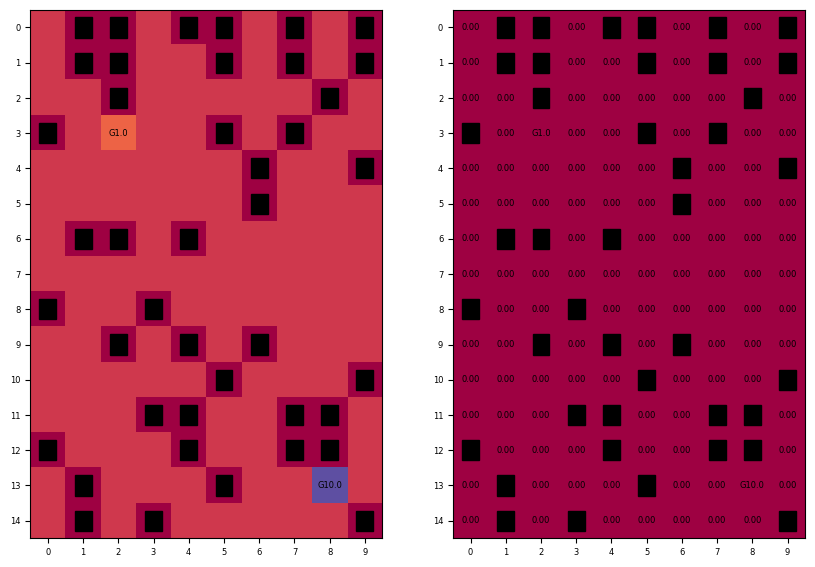

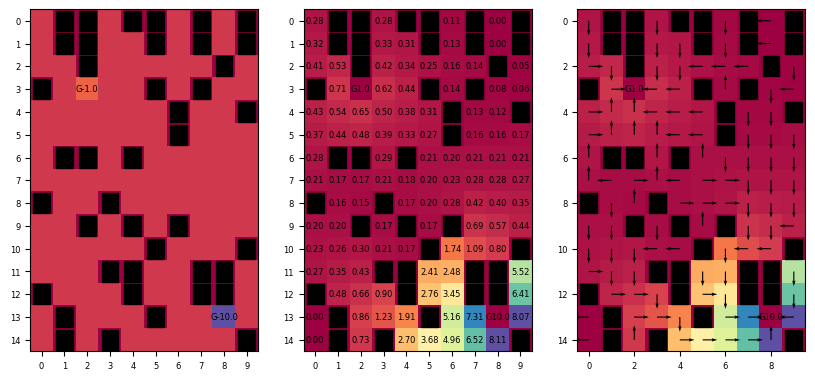

Yes, we converge w.r.t. our tolerance
Distance between V_68(S) and V_69(S) is: 0.0009674911725341284


In [ ]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 45
goal = [(13,8),(3,2)]
rewards_list = [10,1]
max_n_of_iterations = 100
gamma = 0.95
tolerance = 0.001
p = 0.1
random_flag=True

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(
    World = World, initial_values = Values, max_n_of_iterations = max_n_of_iterations, gamma = gamma, tolerance = tolerance, possible_actions = Actions, p = p, random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

Introducing the random component appears to not affect the fact we will take the optimum choice. \
But the fact sometimes it choices to go to the smaller reward and end there, altough he can see far forward (gamma is 0.95). It is interesting. \
Gaia you can think about it🙂🙂🙂🙂🙂